In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec 22 21:51:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#DCGAN
Code from the paper "Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks". 

#Dataset
I'll be using the CelebA dataset as the ground truth for the probability distribution. The GAN will be trained to generate faces.

In [2]:
!gdown --id 12rFbtWMg1NUCW4JKm_dwBpGdb6e-BuHg

Downloading...
From: https://drive.google.com/uc?id=12rFbtWMg1NUCW4JKm_dwBpGdb6e-BuHg
To: /content/CelebA.zip
100% 1.44G/1.44G [00:14<00:00, 99.1MB/s]


In [3]:
!unzip "/content/CelebA.zip" -d "/content/CelebA"

Streaming output truncated to the last 5000 lines.
 extracting: /content/CelebA/img_align_celeba/197600.jpg  
 extracting: /content/CelebA/img_align_celeba/197601.jpg  
 extracting: /content/CelebA/img_align_celeba/197602.jpg  
 extracting: /content/CelebA/img_align_celeba/197603.jpg  
 extracting: /content/CelebA/img_align_celeba/197604.jpg  
 extracting: /content/CelebA/img_align_celeba/197605.jpg  
 extracting: /content/CelebA/img_align_celeba/197606.jpg  
 extracting: /content/CelebA/img_align_celeba/197607.jpg  
 extracting: /content/CelebA/img_align_celeba/197608.jpg  
 extracting: /content/CelebA/img_align_celeba/197609.jpg  
 extracting: /content/CelebA/img_align_celeba/197610.jpg  
 extracting: /content/CelebA/img_align_celeba/197611.jpg  
 extracting: /content/CelebA/img_align_celeba/197612.jpg  
 extracting: /content/CelebA/img_align_celeba/197613.jpg  
 extracting: /content/CelebA/img_align_celeba/197614.jpg  
 extracting: /content/CelebA/img_align_celeba/197615.jpg  
 extr

In [4]:
!pip install tensorflow
!pip install tensorflow_datasets

In [5]:
!sudo du CelebA
!sudo ls CelebA/img_align_celeba | wc -l

1743716	CelebA/img_align_celeba
1743720	CelebA
202599


In [6]:
!pip install opencv-python

(218, 178, 3)


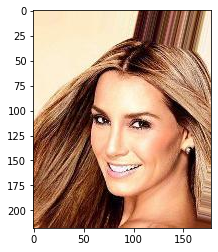

In [1]:
# Test image read

import cv2
import matplotlib.pyplot as plt

# Read in image as ndarray
img = cv2.imread('CelebA/img_align_celeba/000001.jpg')
# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Starting images are 178px resolution
print(img.shape)

# print(img)
plt.imshow(img)

(178, 178, 3)


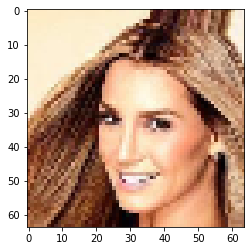

In [2]:

original_img = cv2.imread('CelebA/img_align_celeba/000001.jpg')

# Crop out top and bottom evenly to create a square image
crop_margin = int((original_img.shape[0] - original_img.shape[1]) / 2)
original_img = original_img[crop_margin:(original_img.shape[0] - crop_margin)]

print(original_img.shape)

# Resize to 64x64
img = cv2.resize(original_img, (64, 64))

# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [9]:
!pip install tqdm

In [4]:
# I'm only going to take a subset of the data for now for training

SUBSET_AMOUNT = 10000
SUBSET_AMOUNT = 202599

In [3]:
import tensorflow as tf

# Load in all file names

directory = r'/content/CelebA/img_align_celeba'
list_ds = tf.data.Dataset.list_files(str(directory+'*/*'), shuffle=True)

In [4]:
import os

filenames_list = os.listdir(directory)

In [5]:
for i in filenames_list[:5]:
  print(i)

print("Number of files to read:", len(filenames_list))

026885.jpg
123631.jpg
125585.jpg
003685.jpg
006459.jpg
Number of files to read: 202599


In [5]:
def test_map_function(string):
  print(string + 'TEST')
  return string + 'TEST'

for i in map(test_map_function, filenames_list[:5]):
  print(i)

026885.jpgTEST
026885.jpgTEST
123631.jpgTEST
123631.jpgTEST
125585.jpgTEST
125585.jpgTEST
003685.jpgTEST
003685.jpgTEST
006459.jpgTEST
006459.jpgTEST


In [7]:
for i in list_ds.take(5):
  print(i.numpy())

b'/content/CelebA/img_align_celeba/159018.jpg'
b'/content/CelebA/img_align_celeba/029382.jpg'
b'/content/CelebA/img_align_celeba/077618.jpg'
b'/content/CelebA/img_align_celeba/196827.jpg'
b'/content/CelebA/img_align_celeba/014998.jpg'


In [8]:
def test_convert(string):
  print(string + 'WORKING')
  return string + 'WORKING'

for i in list_ds.take(5).map(test_convert, num_parallel_calls=tf.data.AUTOTUNE):
  print(i)

Tensor("add:0", shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/194159.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/133542.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/054559.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/050269.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/084364.jpgWORKING', shape=(), dtype=string)


In [6]:
import numpy as np

np_filenames_list = np.array(filenames_list)

for i in map(test_map_function, np_filenames_list[:5]):
  print(i)

026885.jpgTEST
026885.jpgTEST
123631.jpgTEST
123631.jpgTEST
125585.jpgTEST
125585.jpgTEST
003685.jpgTEST
003685.jpgTEST
006459.jpgTEST
006459.jpgTEST


In [7]:
# Image getting and processing callback: 
# from image path, get processed 64x64 image
def img_path2data(img_path):

  # print(tf.strings.as_string(img_path))
  # print(tf.io.decode_raw(img_path, tf.uint8))
  # print(type(img_path))
  # if img_path.endswith('.jpg'):

  # Read in image as ndarray
  # print(img_path)
  img = cv2.imread(directory + '/' + img_path)
  # img = tf.io.read_file(img_path)
  # img = tf.io.decode_jpeg(img)

  # Crop out top and bottom evenly to create a square image
  crop_margin = int((img.shape[0] - img.shape[1]) / 2)
  img = img[crop_margin:(img.shape[0] - crop_margin)]

  # Resize to 64x64
  img = cv2.resize(img, (64, 64))

  # BGR -> RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Normalize from [0, 255] to [-1, 1]
  img = (img / (255.0/2)) - 1.0

  return img

In [19]:
map_test = map(img_path2data, filenames_list)

In [20]:
print(type(map_test))

<class 'map'>


In [8]:
# Read images as dataset

from tqdm import tqdm
import tensorflow_datasets as tfds

SUBSET_AMOUNT = 100000

# print(type(tfds.as_numpy(list_ds)))
# print(list_ds.element_spec)
# ds = list_ds.map(img_path2data, num_parallel_calls=tf.data.AUTOTUNE)
# for i in map(img_path2data, filenames_list):
#   print(i)
# ds = list(tqdm(map(img_path2data, filenames_list[:100000])))
# ds = np.array(ds)
# ds = tf.data.Dataset.from_tensor_slices(ds)
ds = tf.data.Dataset.from_tensor_slices(list(tqdm(map(img_path2data, 
                                                      filenames_list[:100000]))))

100000it [02:21, 705.37it/s]


In [12]:
# Move all pixel values into the range [-1, 1] (the range of tanh)

# ds = (ds / (255.0/2)) - 1.0

In [9]:
BATCH_SIZE = 128

# Batch dataset

# dataset = tf.data.Dataset.from_tensor_slices(ds)

ds = ds.batch(BATCH_SIZE)

In [ ]:
for i in ds.take(2):
  print(i)

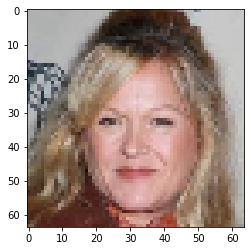

In [10]:
for i in ds.take(1):
  _ = (i+1.0)/2

plt.imshow(_[0])

#Training Loop

In [52]:
# Define Generator and Discriminator

import tensorflow as tf

FINAL_DIM = 128
IMAGE_RES = 64
NOISE_DIM = 100

def Generator():
      
  def add_g_layer(x, filters):
    """
    Generator layers are made up of a fractionally-strided convolution 
    ("deconvolution"), BatchNorm, and ReLU activation. 
    """
    x = tf.keras.layers.Conv2DTranspose(filters, kernel_size=(5, 5), 
                                        strides=(2, 2), padding='same', 
                                        activation=None)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    return x

  def output_g_layer(x):
    # Final fractionally-strided convolution ("deconvolution") into image space
    x = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(5, 5), 
                                        strides=(2, 2), padding='same', 
                                        activation=None)(x)
    x = tf.math.tanh(x)
    return x

  # Define input noise vector shape
  noise_input = tf.keras.layers.Input(shape=(NOISE_DIM))

  # Initial projection into 4x4 feature maps
  x = tf.keras.layers.Dense(4 * 4 * (FINAL_DIM * 8), 
                            activation=None)(noise_input)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Reshape((4, 4, (FINAL_DIM * 8)))(x)

  # Generator fractionally-strided convolutional layers
  x = add_g_layer(x, filters=FINAL_DIM * 4)
  x = add_g_layer(x, filters=FINAL_DIM * 2)
  x = add_g_layer(x, filters=FINAL_DIM)

  # Final convolution (convert feature maps into image)
  x = output_g_layer(x)

  # Model definition
  model = tf.keras.Model(inputs=noise_input, outputs=x, name='DCGAN_Generator')

  print(model.summary())

  return model


def Discriminator():

  """
  The Discriminator, for the most part, mirrors, the Generator. Key differences
  are 1) LeakyReLU(0.2) instead of ReLU, and 2) Output FC layer(1) with sigmoid
  activation.
  """

  def add_d_layer(x, filters):
    """
    Discriminator layers are made up of a strided convolutional layer 
    (downsampling without pooling), BatchNorm, and LeakyReLU (leak=0.2)
    """
    x = tf.keras.layers.Conv2D(filters, kernel_size=(5, 5), strides=(2, 2), 
                               padding='same', activation=None)(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    # x = tf.keras.layers.Dropout(0.3)(x)
    return x

  def output_d_layer(x):
    """
    Final layer in Discriminator. Single neuron with sigmoid activation for
    classification of image as fake or real. 
    """
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1)(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.math.sigmoid(x)
    return x

  """Start: Image of dimensions (64, 64, 3). End: Fake/real classification value 
  ranging [0, 1]"""

  image_input = tf.keras.layers.Input(shape=(IMAGE_RES, IMAGE_RES, 3))

  # Discriminator's strided convolutions
  x = add_d_layer(image_input, filters=FINAL_DIM)
  x = add_d_layer(x, filters=FINAL_DIM * 2)
  x = add_d_layer(x, filters=FINAL_DIM * 4)
  x = add_d_layer(x, filters=FINAL_DIM * 8)

  # Discriminator's output layer
  x = output_d_layer(x)

  model = tf.keras.Model(inputs=image_input, outputs=x, 
                         name='DCGAN_Discriminator')

  print(model.summary())

  return model

g = Generator()
d = Discriminator()


Model: "DCGAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_46 (Dense)            (None, 16384)             1654784   
                                                                 
 batch_normalization_84 (Bat  (None, 16384)            65536     
 chNormalization)                                                
                                                                 
 reshape_23 (Reshape)        (None, 4, 4, 1024)        0         
                                                                 
 conv2d_transpose_92 (Conv2D  (None, 8, 8, 512)        13107712  
 Transpose)                                                      
                                                                 
 batch_normalization_85 (Bat  (None, 8, 8, 512)    

In [33]:
# Test noise input for Generator

def get_noise_samples(n_samples):
  return(np.random.rand(n_samples, 100))

rand_noise_vec = get_noise_samples(1)
rand_noise_vec

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
        3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
        2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01,
        4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01,
        8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
        8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
        1.69830420e-01, 8.78142503e-01, 9.83468338e-02, 4.21107625e-01,
        9.57889530e-01, 5.33165285e-01, 6.91877114e-01, 3.15515631e-01,
        6.86500928e-01, 8.34625672e-01, 1.82882773e-02, 7.50144315e-01,
        9.88861089e-01, 7.48165654e-01, 2.80443992e-01, 7.89279328e-01,
        1.03226007e-01, 4.47893526e-01, 9.08595503e-01, 2.93614148e-01,
        2.87775339e-01, 1.30028572e-01, 1.93669579e-02, 6.78835533e-01,
        2.11628116e-01, 2.65546659e-01, 4.91573159e-01, 5.336254

tf.Tensor(
[[[[ 2.39016590e-05 -5.03350748e-06 -6.99320026e-06]
   [-3.86632237e-05  2.86162367e-06 -9.57098528e-05]
   [-2.08558049e-05 -7.00888486e-05 -1.58502255e-04]
   ...
   [-1.30766653e-04 -3.12784483e-04  3.24210676e-04]
   [ 2.77706975e-04 -1.76645830e-04 -5.28705132e-05]
   [-4.34976319e-05 -1.23171252e-04  1.30398475e-04]]

  [[ 7.41583353e-05  2.12470506e-04  1.70644882e-04]
   [ 1.20629120e-04 -4.32016503e-04 -5.21122070e-04]
   [ 5.91179705e-04 -3.41797859e-05  5.34509425e-04]
   ...
   [ 3.46590037e-04  3.56592238e-04 -3.87139153e-04]
   [-7.46701189e-05 -8.25197436e-04  2.43473100e-04]
   [-2.29031953e-04  8.06232798e-04 -3.33009695e-04]]

  [[-2.72274396e-04 -4.11271903e-05  1.25022139e-04]
   [ 1.37074385e-04  1.10652261e-04  3.10652715e-04]
   [-4.93261497e-04  3.09856434e-04 -3.83016450e-05]
   ...
   [-4.43969388e-04 -5.10496960e-04 -9.21497180e-04]
   [ 1.36453338e-04 -5.82999608e-04 -2.82663212e-04]
   [-7.51375163e-04 -8.04437732e-05 -1.29721942e-04]]

  ...

 

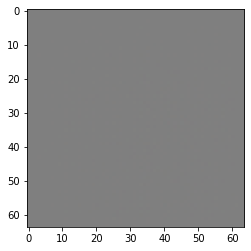

In [34]:
# Feed noise into G and see what we get

test_img = g(rand_noise_vec)

print(test_img)

for img in test_img:
  plt.imshow((img+1)/2)

In [36]:
# Sampling random images from the dataset

# def get_image_samples(n_samples):
#   return(ds.as_numpy_iterator()[np.random.randint(ds.as_numpy_iterator().shape[0], size=n_samples)])

# plt.imshow((get_image_samples(10)[1]+1)/2)

In [38]:
# Test D

# print(d(get_image_samples(1)))

In [17]:
g = Generator()
d = Discriminator()

Model: "DCGAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 2048)              206848    
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 8, 8, 64)         204864    
 ranspose)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 8, 8, 64)     

In [55]:
import time

g = Generator()
d = Discriminator()

# Training loop

EPOCHS = 100
D_STEPS = 1
G_STEPS = 1
BATCH_SIZE = 128

# Model checkpointing paths
g_cp_path = './g/cp'
d_cp_path = './d/cp'

# Set seed
np.random.seed(1)

# Optimizers
d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
# d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
# g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Track current batch iteration
i = 0

# Losses

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Format from https://www.tensorflow.org/tutorials/generative/dcgan:
def d_loss(real_predictions, fake_predictions):

  # Track Discriminator predictions
  real = real_predictions.numpy()[0][0]
  fake = fake_predictions.numpy()[0][0]
  print('R:', real)
  print('F:', fake)
  if abs(real - fake) < 0.5:
    print('Iterations until bug:', i)

  # Label all real predictions' ground truth as 1, compute b-crossentropy
  real_loss = cross_entropy(tf.ones_like(real_predictions), 
                                                   real_predictions)
  # Label all fake predictions' ground truth as 0, compute b-crossentropy
  fake_loss = cross_entropy(tf.zeros_like(fake_predictions),
                                                   fake_predictions)
  
  loss = real_loss + fake_loss
  return loss

def print_realandfake_d():

  fake_pred = d(g(get_noise_samples(1)))  # , Training=True
  real_pred = d()

def g_loss(d_values):

  # Binary Crossentropy between the Discriminator outputs and 1 (which we'd like 
  # the Discriminator outputs to be)
  loss = tf.keras.losses.BinaryCrossentropy()(tf.ones_like(d_values),
                                              d_values)
  return loss

# Training step definitions
# Compiled for training

# @tf.function
def d_train_step(data_examples):

  with tf.GradientTape() as d_tape:

    # Sample m noise samples
    noise_samples = get_noise_samples(BATCH_SIZE)

    # Get Generator examples from the noise
    g_examples = g(noise_samples)

    # Run Discriminator and get loss
    loss = d_loss(d(data_examples, training=True), d(g_examples, training=True))

  # Get all Discriminator gradients with GradientTape
  d_grad = d_tape.gradient(loss, d.trainable_variables)

  # Apply gradients to model, zipping gradients with corresponding variables
  d_optimizer.apply_gradients(zip(d_grad, d.trainable_variables))

@tf.function
def g_train_step():

  # All steps of the process must be within for backpropagation to work
  with tf.GradientTape() as g_tape:

    # Sample m noise samples
    noise_samples = get_noise_samples(BATCH_SIZE)

    # Get Generator (fake) examples from the noise
    g_examples = g(noise_samples)

    # Run discriminator on generated samples
    d_values = d(g_examples, training=True)

    # Get loss
    loss = g_loss(d_values)

  # Use GradientTape to get all Generator gradients
  g_grad = g_tape.gradient(loss, g.trainable_variables)

  # Apply gradients
  g_optimizer.apply_gradients(zip(g_grad, g.trainable_variables))

# @tf.function
def train_step():

  time_cp = time.time()
  global i
  i = 0
  for batch in ds:

    # Train Discriminator to distinguish between the two
    for j in range(D_STEPS):
      d_train_step(batch)

    # Train Generator to maximize the probability of tricking the discriminator
    for j in range(G_STEPS):
      g_train_step()    

    i += 1
    update_batches = 5
    if i % update_batches == 0:
      
      print('Update', i/update_batches, )
      print('Time elapsed for last ' + str(update_batches) + ' batches:', 
            time.time() - time_cp)
      time_cp = time.time()

      # Display generator image
      for img in g(rand_noise_vec):
        # print(img.numpy())
        plt.imshow((img.numpy()+1)/2)
        plt.show()
    
  # Save weights
  print('Saving Weights...')
  g.save_weights(g_cp_path)
  d.save_weights(d_cp_path) 

Model: "DCGAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_50 (Dense)            (None, 16384)             1654784   
                                                                 
 batch_normalization_92 (Bat  (None, 16384)            65536     
 chNormalization)                                                
                                                                 
 reshape_25 (Reshape)        (None, 4, 4, 1024)        0         
                                                                 
 conv2d_transpose_100 (Conv2  (None, 8, 8, 512)        13107712  
 DTranspose)                                                     
                                                                 
 batch_normalization_93 (Bat  (None, 8, 8, 512)    

R: 0.49639118
F: 0.5000299
Iterations until bug: 0
R: 0.750352
F: 0.5013241
Iterations until bug: 1
R: 0.98263794
F: 0.52754366
Iterations until bug: 2
R: 0.99970347
F: 0.62015384
Iterations until bug: 3
R: 0.99979395
F: 0.588518
Iterations until bug: 4
Update 1.0
Time elapsed for last 5 batches: 5.733036994934082


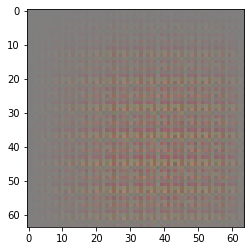

R: 0.93745524
F: 0.46941903
Iterations until bug: 5
R: 0.9928606
F: 0.45965156
R: 0.99901736
F: 0.4645677
R: 1.0
F: 0.45890033
R: 1.0
F: 0.44141555
Update 2.0
Time elapsed for last 5 batches: 2.663851499557495


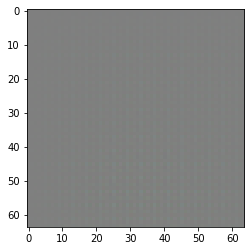

R: 0.99999714
F: 0.4600223
R: 0.99999905
F: 0.57851446
Iterations until bug: 11
R: 0.9999974
F: 0.37566024
R: 0.99999774
F: 0.2541318
R: 0.9999943
F: 0.17101386
Update 3.0
Time elapsed for last 5 batches: 2.6506736278533936


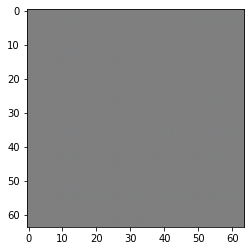

R: 1.0
F: 0.0727694
R: 1.0
F: 0.024021946
R: 1.0
F: 0.031806346
R: 1.0
F: 0.91210234
Iterations until bug: 18
R: 0.99999607
F: 0.9544189
Iterations until bug: 19
Update 4.0
Time elapsed for last 5 batches: 2.904052495956421


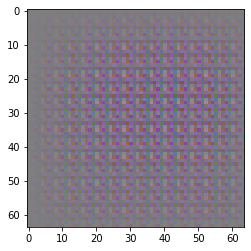

R: 0.9333684
F: 0.0004388418
R: 0.99999976
F: 0.1279758
R: 1.0
F: 0.000102876926
R: 1.0
F: 3.2114418e-05
R: 1.0
F: 3.387973e-05
Update 5.0
Time elapsed for last 5 batches: 2.6701314449310303


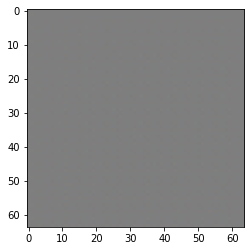

R: 1.0
F: 5.157469e-05
R: 1.0
F: 0.00034134483
R: 1.0
F: 0.564082
Iterations until bug: 27
R: 0.887771
F: 0.39637014
Iterations until bug: 28
R: 0.9984773
F: 0.018365482
Update 6.0
Time elapsed for last 5 batches: 2.665605068206787


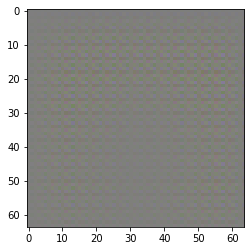

R: 0.991779
F: 0.016484478
R: 2.632946e-06
F: 0.065637216
Iterations until bug: 31
R: 1.0
F: 0.00010354164
R: 1.0
F: 3.6945672e-05
R: 1.0
F: 0.00026187554
Update 7.0
Time elapsed for last 5 batches: 2.6683924198150635


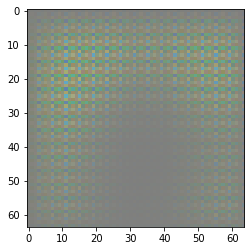

R: 1.0
F: 0.62296605
Iterations until bug: 35
R: 0.9999999
F: 7.09952e-07
R: 1.0
F: 4.334292e-08
R: 0.9999504
F: 8.564866e-08
R: 0.99999297
F: 4.829022e-07
Update 8.0
Time elapsed for last 5 batches: 2.6709463596343994


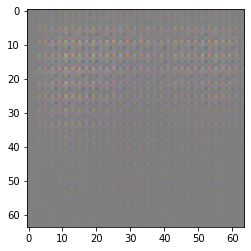

R: 1.0
F: 0.00017175717
R: 1.0
F: 0.47812656
R: 0.99999976
F: 0.014532498
R: 1.4832574e-06
F: 1.4935368e-07
Iterations until bug: 43
R: 0.99999917
F: 0.20060208
Update 9.0
Time elapsed for last 5 batches: 2.6572699546813965


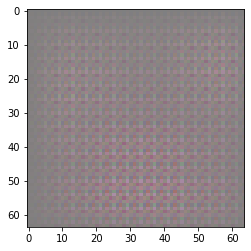

R: 1.0
F: 7.959735e-12
R: 8.561083e-18
F: 3.7689057e-10
Iterations until bug: 46
R: 0.9999938
F: 5.0951128e-09
R: 2.577194e-11
F: 1.3512175e-08
Iterations until bug: 48
R: 1.0
F: 3.342669e-08
Update 10.0
Time elapsed for last 5 batches: 2.6583197116851807


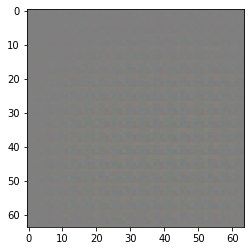

R: 1.0
F: 1.3136545e-07
R: 1.0
F: 0.013863779
R: 1.0
F: 0.99947196
Iterations until bug: 52
R: 1.0
F: 1.0
Iterations until bug: 53
R: 1.0
F: 1.0
Iterations until bug: 54
Update 11.0
Time elapsed for last 5 batches: 2.668358325958252


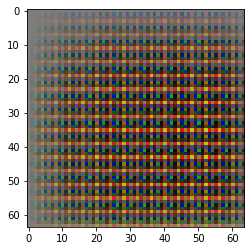

R: 1.0
F: 1.0
Iterations until bug: 55
R: 1.0
F: 1.0
Iterations until bug: 56
R: 1.0
F: 1.0
Iterations until bug: 57
R: 1.0
F: 1.0
Iterations until bug: 58
R: 1.0
F: 1.0
Iterations until bug: 59
Update 12.0
Time elapsed for last 5 batches: 2.661659002304077


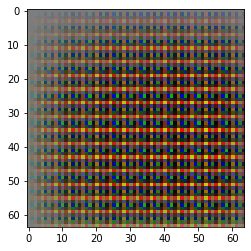

R: 1.0
F: 1.0
Iterations until bug: 60
R: 1.0
F: 1.0
Iterations until bug: 61
R: 1.0
F: 1.0
Iterations until bug: 62
R: 1.0
F: 1.0
Iterations until bug: 63
R: 1.0
F: 1.0
Iterations until bug: 64
Update 13.0
Time elapsed for last 5 batches: 2.6664767265319824


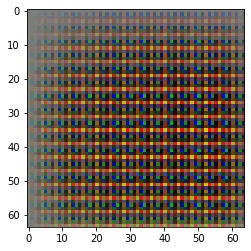

R: 1.0
F: 1.0
Iterations until bug: 65
R: 1.0
F: 1.0
Iterations until bug: 66
R: 1.0
F: 1.0
Iterations until bug: 67
R: 1.0
F: 1.0
Iterations until bug: 68
R: 1.0
F: 1.0
Iterations until bug: 69
Update 14.0
Time elapsed for last 5 batches: 2.6710078716278076


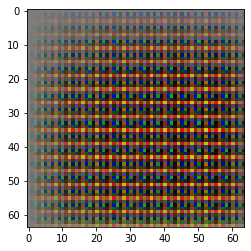

R: 1.0
F: 1.0
Iterations until bug: 70
R: 1.0
F: 1.0
Iterations until bug: 71
R: 1.0
F: 1.0
Iterations until bug: 72
R: 1.0
F: 1.0
Iterations until bug: 73
R: 1.0
F: 1.0
Iterations until bug: 74
Update 15.0
Time elapsed for last 5 batches: 2.6629183292388916


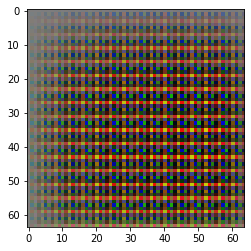

R: 1.0
F: 1.0
Iterations until bug: 75


KeyboardInterrupt: ignored

In [56]:
# Train

def train(EPOCHS):

  for i in range(EPOCHS):

    train_step()
    print("EPOCH " + str(i))

train(10)

tf.Tensor(
[[[[ 1.12502382e-03 -2.04627169e-03 -2.49071489e-03]
   [ 2.27413070e-03 -1.77720014e-03 -2.09537288e-03]
   [ 9.13575175e-04 -3.05886636e-03 -2.07877089e-03]
   ...
   [ 2.38127494e-03 -2.35313992e-03 -2.37391610e-03]
   [ 5.57251100e-04 -2.89784861e-03 -1.45730085e-03]
   [ 1.39938924e-03 -2.09562248e-03 -3.43269808e-03]]

  [[ 2.71131610e-03 -4.18751093e-04 -2.55604438e-03]
   [ 3.08001391e-03 -3.89338424e-03 -3.56943742e-03]
   [ 3.32979369e-03 -7.12959911e-04 -9.36175813e-04]
   ...
   [ 5.23495395e-03 -7.28471903e-03 -4.16375324e-03]
   [ 3.59921902e-03 -1.49556925e-03 -1.42948213e-03]
   [ 4.17355960e-03 -5.73009625e-03 -3.10708187e-03]]

  [[ 1.08557683e-03 -2.79204221e-03 -2.95645883e-03]
   [ 1.22361118e-03 -1.36034528e-03 -5.57720254e-04]
   [ 3.87150445e-04 -4.04730439e-03 -3.04922066e-03]
   ...
   [ 3.86425992e-04 -1.72130635e-03 -1.13695301e-03]
   [ 1.18085765e-04 -4.71739471e-03 -3.85239278e-03]
   [ 1.30999659e-03 -3.83028225e-03 -4.70717001e-04]]

  ...

 

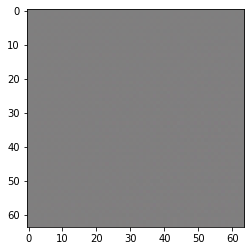

In [25]:
test_img = g(rand_noise_vec)

print(test_img)

for img in test_img:
  plt.imshow((img + 1)/2)

In [299]:
test_g_sample = g(get_noise_samples(1))
test_real_sample = get_image_samples(1)

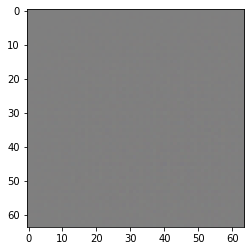

In [278]:
plt.imshow((test_g_sample[0]+1)/2)

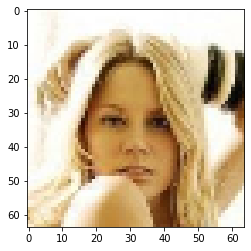

In [300]:
plt.imshow((test_real_sample[0]+1)/2)

In [119]:
# Discriminator test

# Note: Since the generator is trained after the discriminator during the sequence, 

fake = 0
real = 0

for i in range(200):
  test_g_sample = g(get_noise_samples(1))
  test_real_sample = get_image_samples(1)
  fake+=d(test_g_sample)
  real+=d(test_real_sample)

print(fake/200.0)
print(real/200.0)

# print(d(test_g_sample))

# print(d(test_real_sample))

# print(d(g(get_noise_samples(1))))

# print(d(get_image_samples(1)))

tf.Tensor([[5.6096707e-07]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


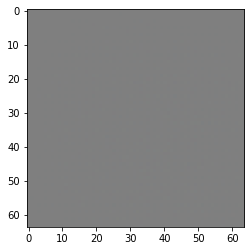

In [120]:
plt.imshow((g(get_noise_samples(1))[0]+1)/2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


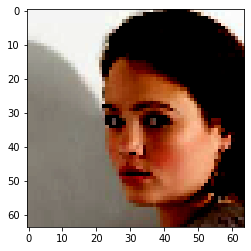

In [ ]:
plt.imshow(data_examples[0])

In [ ]:
# Prepare data

real_ds = tf.keras.utils.image_dataset_from_directory('/content/CelebA/img_align_celeba/', 
                                                      validation_split=0.1, 
                                                      subset='training', seed=1)


Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: ignored

In [ ]:
# Load dataset

import tensorflow_datasets as tfds

ds = tfds.load('celeb_a', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

KeyError: ignored